## INSURANCE CLAIMS


### importing the Data and necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import statistics 
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scipy.stats as stats

In [3]:
claim = pd.read_csv(r"C:\Users\RADIANT COMPUTERS\Desktop\divyansh_lms\python case study 3\claims.csv")
claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
cust = pd.read_csv(r"C:\Users\RADIANT COMPUTERS\Desktop\divyansh_lms\python case study 3\cust_demographics.csv")
cust.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [6]:
claim.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


#### Maring the Data sets & Data info


In [7]:
insurance=pd.merge(claim,cust,how='inner',left_on='customer_id',right_on='CUST_ID')
insurance.head()


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver


In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [9]:
insurance.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment'],
      dtype='object')

In [10]:
insurance.select_dtypes(object)

,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,Driver error,11/27/2017,Auto,No,Material only,$2980,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,Crime,10/03/2018,Home,Unknown,Material only,$2980,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,Driver error,04/04/2018,Auto,No,Material only,$1950,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,Natural causes,06/17/2018,Auto,No,Material only,$1680,No,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...
1080,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,No,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,Other causes,05/09/2017,Home,No,Material only,$2800,No,Female,07-Jul-96,ID,529-462-1635,Silver
1082,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,No,Male,11-Apr-90,WI,712-651-9613,Gold
1083,Other driver error,04/18/2017,Auto,No,Material only,$2840,No,Female,22-Oct-64,LA,469-345-5617,Silver


In [11]:
insurance.select_dtypes(['int','float'])

,claim_id,customer_id,total_policy_claims,CUST_ID
0,54004764,21868593,1.0,21868593
1,33985796,75740424,3.0,75740424
2,53522022,30308357,1.0,30308357
3,63017412,30308357,6.0,30308357
4,13015401,47830476,1.0,47830476
...,...,...,...,...
1080,62020796,79539873,1.0,79539873
1081,63269067,42364152,1.0,42364152
1082,22690595,19888166,2.0,19888166
1083,12376894,11256802,4.0,11256802


In [12]:
insurance.drop('CUST_ID',axis=1,inplace=True)

### Match The Date Types Accounding To The Data

### Chaning into Date Data_type 

In [13]:
insurance.claim_date.str.replace('/','-')

0       11-27-2017
1       10-03-2018
2       02-02-2018
3       04-04-2018
4       06-17-2018
           ...    
1080    09-06-2018
1081    05-09-2017
1082    05-15-2017
1083    04-18-2017
1084    03-16-2017
Name: claim_date, Length: 1085, dtype: object

In [14]:
insurance["claim_date"]= insurance["claim_date"].apply(pd.to_datetime)

In [15]:
insurance["DateOfBirth"]= insurance["DateOfBirth"].astype("datetime64[ns]",format ('d%B%y'))

C:\Users\RADIANT COMPUTERS\AppData\Local\Temp\ipykernel_11124\2378573518.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  insurance["DateOfBirth"]= insurance["DateOfBirth"].astype("datetime64[ns]",format ('d%B%y'))


In [16]:
insurance['DateOfBirth']=insurance['DateOfBirth'].apply(lambda x:x.replace(year=x.year-100) if x.year>2000 else x)

In [17]:
insurance['DateOfBirth']

0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1984-03-11
4      1986-05-01
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   1964-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1085, dtype: datetime64[ns]

### Chaning into Object Data_type

In [18]:
insurance['claim_id'] = insurance['claim_id'].astype(object)


In [19]:
insurance['customer_id'] = insurance['customer_id'].astype(object)


### Chaning into Numerical  Data_typer emove the $ sign from claim_amount

In [20]:
insurance['claim_amount'] =insurance['claim_amount'].str.removeprefix('$')


In [21]:
# insurance['claim_amount']
# insurance.claim_amount.str.replace('$',"",regex=True)
insurance.claim_amount= insurance.claim_amount.astype(float)


In [22]:
# insurance.claim_amount= insurance.claim_amount.astype(float)


In [23]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   object        
 1   customer_id          1085 non-null   object        
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   float64       
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

In [24]:
# def remove_dollar_sign(value):
#     return value.s.replace('$', '')

# insurance['claim_amount'] = insurance['claim_amount'].apply(remove_dollar_sign)


### Create an alert flag (1,0) for all such claims
Of all the injury claims some of them have gone unreported with the 
polie 
s

In [25]:
insurance[(insurance['police_report']=='Unknown') &  (insurance['claim_type'].isin(['Injury only', 'Material and injury']))]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold
15,28564401,51583214,Other driver error,2017-12-10,Auto,Unknown,Material and injury,16690.0,1.0,No,Male,1999-10-31,NH,743-486-5264,Platinum
53,40638641,38286862,Other causes,2017-10-31,Auto,Unknown,Material and injury,41850.0,1.0,No,Female,1994-11-24,NJ,791-831-2514,Gold
55,39647651,18361978,Other causes,2017-08-31,Auto,Unknown,Material and injury,25576.0,7.0,Yes,Female,1994-07-10,CA,463-645-2453,Platinum
59,54192772,61051505,Other driver error,2017-07-01,Auto,Unknown,Material and injury,35765.0,1.0,Yes,Male,1968-02-05,OH,649-461-2967,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,50022306,10198314,Other causes,2018-05-01,Auto,Unknown,Injury only,28658.0,1.0,Yes,Female,1980-11-10,WI,176-861-1936,Platinum
990,16402994,86164274,Other causes,2018-09-26,Home,Unknown,Material and injury,15760.0,1.0,No,Male,1962-12-28,SC,843-361-2796,Platinum
1023,30903408,77134414,Other driver error,2017-01-07,Auto,Unknown,Injury only,28760.0,1.0,No,Male,1983-07-10,AL,693-239-2865,Silver
1051,93043462,81634435,Other driver error,2017-01-27,Home,Unknown,Material and injury,NaN,1.0,No,Male,1988-07-30,AR,937-675-5842,Gold


In [26]:
# insurance[insurance['claim_type'] != 'Material only']
# set(insurance['claim_type'])

In [27]:
insurance['injury_claim'] = insurance.apply(lambda x: 1 if x['police_report'] == "Unknown" and x['claim_type'] != 'Material only' else 0, axis=1)

In [28]:
insurance['injury_claim']



0       0
1       0
2       0
3       0
4       0
       ..
1080    0
1081    0
1082    0
1083    0
1084    0
Name: injury_claim, Length: 1085, dtype: int64

### Remove duplicated records

In [29]:
insurance[insurance.duplicated(subset=['customer_id'])]


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,injury_claim
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17,NH,419-712-8513,Gold,1
608,78221963,84147585,Driver error,2018-04-10,Auto,Yes,Injury only,14430.0,4.0,No,Male,1972-10-18,AK,743-569-4783,Gold,0
610,1654201,85357756,Driver error,2018-06-23,Auto,Unknown,Material only,2510.0,1.0,No,Male,1970-01-02,PA,915-698-3649,Platinum,0
612,41779510,53539195,Driver error,2018-10-03,Home,No,Injury only,25040.0,1.0,No,Male,1989-10-02,NV,914-342-8239,Gold,0


In [30]:
insurance.sort_values(by='claim_date',ascending=True,inplace=True
                     )

In [31]:
insurance.drop_duplicates(subset=['customer_id'],keep='first',inplace=True)

###  impute the missing values with an mean for continuous and mode for categorical

In [32]:
insurance.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
injury_claim            0
dtype: int64

In [33]:
cl_amount=round(insurance.claim_amount.mean())

In [34]:
insurance['claim_amount'].fillna(cl_amount,inplace= True)

In [35]:
insurance['claim_amount'].isna().sum()

0

In [36]:
policy_claim=round(insurance.total_policy_claims.mean())

In [37]:
insurance.total_policy_claims.fillna(policy_claim,inplace= True)

In [38]:
insurance['total_policy_claims'].isna().sum()

0

### Calculate the age of customers in years
##### (Children < 18)(Youth 18-30)(
Adult 30-)(0
Senior >)60


In [39]:
count_age = insurance['claim_date'].median()

In [40]:
insurance['Age'] =(count_age-insurance['DateOfBirth']).dt.days//365

In [41]:
def age_categore(age):
    if age < 18:
        return 'Children'
    elif 18 <= age < 30:
        return 'Youth'
    elif 30 <= age < 60:
        return 'Adult'
    else:
        return 'Senior'

In [42]:
insurance['age_category']= insurance['Age'].apply(age_categore)
# x.apply(lambda x :'children' if x <=18 else 'youth' if 18 <x <=30 else 

In [43]:
insurance[['Age','age_category']]

,Age,age_category
739,46,Adult
181,23,Youth
312,42,Adult
905,24,Youth
120,52,Adult
...,...,...
354,41,Adult
286,50,Adult
226,43,Adult
1077,53,Adult


In [44]:
# 
#insurance['Age2'] =(insurance['claim_date']-insurance['DateOfBirth']).dt.days//365
#

### What is the average amount claimed by the customers from various segments?


In [45]:
insurance.groupby(['Segment'])['claim_amount'].mean().reset_index()

,Segment,claim_amount
0,Gold,12756.450135
1,Platinum,12369.283934
2,Silver,12268.700867


### What is the total claim amount based on incident cause for all the claims.

### that have been done at least 20 days prior to 1st of October, 2018.

In [46]:
start_date = '2018-10-01'
end_date = pd.Timestamp(start_date) - pd.DateOffset(days=20) 


In [47]:
insurance[insurance['claim_date'].between(end_date,start_date)]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,injury_claim,Age,age_category
148,74738945,88449349,Other causes,2018-09-12,Auto,No,Material only,1080.0,1.0,No,Male,1979-12-17,WA,975-547-5196,Platinum,0,37,Adult
134,4112041,58402401,Other causes,2018-09-12,Auto,Unknown,Material and injury,32710.0,1.0,No,Male,1979-06-13,KS,134-129-8167,Silver,1,38,Adult
416,87476916,92072156,Natural causes,2018-09-12,Auto,Yes,Material only,2970.0,1.0,No,Female,1971-07-28,DE,186-419-2974,Silver,0,46,Adult
975,66301062,30015627,Natural causes,2018-09-12,Auto,Yes,Material only,2208.0,4.0,Yes,Male,1969-09-11,SC,254-523-1634,Silver,0,48,Adult
508,81102722,91135917,Other driver error,2018-09-12,Auto,No,Material only,2710.0,1.0,No,Male,1986-08-15,NV,697-129-2549,Platinum,0,31,Adult
305,2581621,18213216,Other causes,2018-09-12,Auto,Unknown,Material and injury,21942.0,2.0,Yes,Male,1969-10-06,KY,416-461-9145,Silver,1,48,Adult
898,4812972,78341228,Natural causes,2018-09-12,Auto,Unknown,Material only,2090.0,1.0,No,Male,1986-11-26,SD,475-573-2957,Gold,0,31,Adult
1009,78804570,69165409,Other causes,2018-09-12,Auto,No,Material and injury,19390.0,1.0,No,Female,1994-10-11,NY,843-784-1843,Silver,0,23,Youth
786,98596005,73876237,Driver error,2018-09-12,Auto,No,Material only,2130.0,1.0,No,Female,1975-01-27,AL,879-185-4857,Silver,0,42,Adult
445,72555621,58934617,Other causes,2018-09-19,Auto,Yes,Injury only,27002.0,3.0,Yes,Male,1990-04-01,CA,157-896-3619,Platinum,0,27,Youth


In [48]:
insurance[insurance['claim_date'].between(end_date,start_date)]['claim_amount'].sum()

322443.5

### How many adults from TX, DE and AK claimed insurance for driver 
related issues and causes? 

In [49]:
# set(insurance['incident_cause']) ,set(insurance['age_category']), set(insurance['State'])

In [50]:
diver_related=insurance[insurance['incident_cause'].isin(['Driver error','Other diver error'])]

In [51]:
diver_related[(diver_related['State'].isin(['TX','DE','AK'])) & (diver_related['age_category']=='Adult')]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,injury_claim,Age,age_category
607,30280492,84147585,Driver error,2017-01-07,Auto,Unknown,Material only,2380.0,1.0,No,Male,1972-10-18,AK,743-569-4783,Gold,0,45,Adult
263,31574986,11321295,Driver error,2017-02-03,Auto,No,Material only,2460.0,2.0,No,Male,1965-11-13,DE,429-596-2169,Platinum,0,52,Adult
430,22577147,66433138,Driver error,2017-02-23,Auto,No,Material and injury,21447.5,2.0,Yes,Male,1978-06-27,TX,752-617-3867,Gold,0,39,Adult
984,17396013,44050095,Driver error,2017-03-22,Auto,Unknown,Material and injury,20458.5,1.0,Yes,Male,1977-06-04,DE,314-298-9257,Platinum,1,40,Adult
103,82144259,92752865,Driver error,2017-04-25,Auto,No,Injury only,12470.0,1.0,No,Male,1986-01-30,AK,143-219-5498,Silver,0,31,Adult
849,94983900,18282409,Driver error,2017-08-11,Auto,No,Injury only,31020.0,2.0,No,Female,1973-09-29,AK,326-215-7361,Gold,0,44,Adult
706,6365892,42083451,Driver error,2017-08-31,Auto,No,Material only,2400.0,1.0,No,Male,1967-11-23,AK,689-375-9463,Platinum,0,50,Adult
574,53831641,15820948,Driver error,2017-09-27,Auto,Yes,Material and injury,14570.0,1.0,No,Male,1964-02-22,TX,583-641-3184,Silver,0,53,Adult
381,70068,4669941,Driver error,2017-11-06,Auto,Unknown,Injury only,29900.0,1.0,Yes,Male,1982-08-03,AK,761-462-3458,Platinum,1,35,Adult
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12470.0,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0,39,Adult


In [52]:
diver_related[(diver_related['State'].isin(['TX','DE','AK'])) & (diver_related['age_category']=='Adult')].shape[0]

12

###  Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.

In [53]:
pie_chart1=insurance.groupby(['Segment'])['claim_amount'].sum()

In [54]:
pie_chart2=insurance.groupby(['gender'])['claim_amount'].sum()

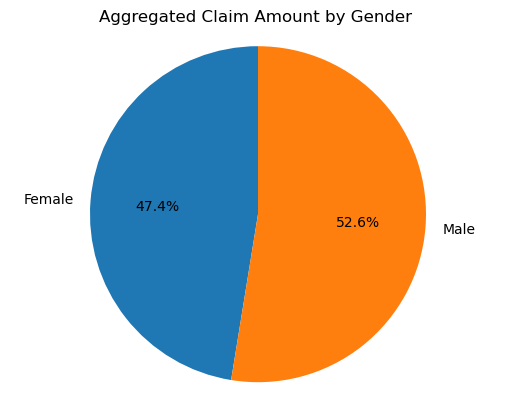

In [55]:
plt.pie(pie_chart2,labels=pie_chart2.index,autopct='%0.1f%%',startangle=90)
plt.title('Aggregated Claim Amount by Gender ')
plt.axis('equal')
plt.show()

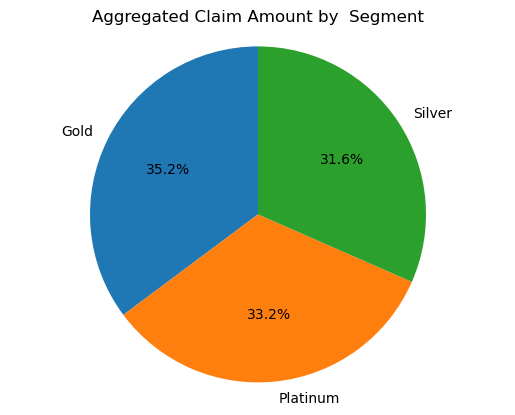

In [56]:
plt.pie(pie_chart1,labels=pie_chart1.index,autopct='%0.1f%%',startangle=90)
plt.title('Aggregated Claim Amount by  Segment')
plt.axis('equal')
plt.show()


### Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar char

In [57]:
insurance[insurance['incident_cause'].isin(['Driver error','Other driver error'])].shape

(501, 18)

In [58]:
gender_claim=insurance[insurance['incident_cause'].isin(['Driver error','Other driver error'])].groupby(['gender'])['incident_cause'].count()

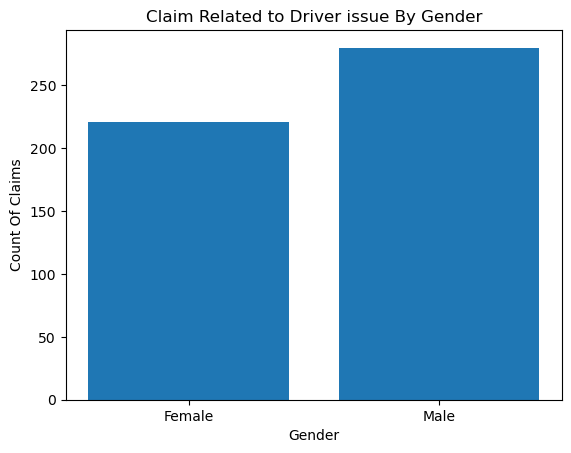

In [59]:

plt.bar(gender_claim.index,gender_claim.values)
plt.title("Claim Related to Driver issue By Gender")
plt.ylabel("Count Of Claims")
plt.xlabel('Gender')
plt.show()

In [60]:
# fraudulent_policy.values

### Which age group had the maximum fraudulent policy claims? Visualize iit on a bar chart.


In [61]:
set(insurance['fraudulent'])

{'No', 'Yes'}

In [62]:
fraud_claim=insurance[insurance['fraudulent']=='Yes']

In [63]:
fraudulent_policy=fraud_claim.groupby(['age_category'])['fraudulent'].count()

In [64]:
fraudulent_policy

age_category
Adult       173
Children      1
Youth        73
Name: fraudulent, dtype: int64

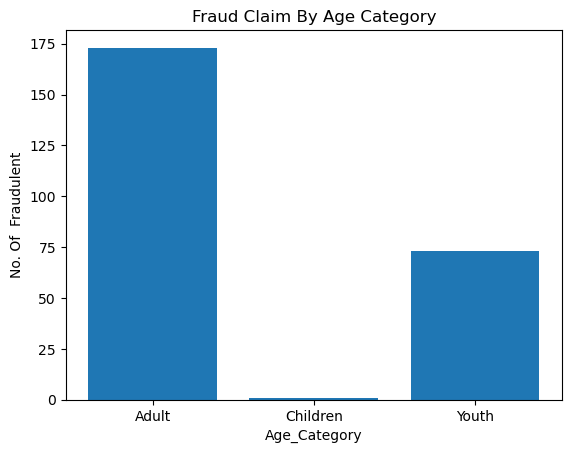

In [65]:
plt.bar(fraudulent_policy.index,fraudulent_policy.values)
plt.ylabel("No. Of  Fraudulent")
plt.xlabel('Age_Category')
plt.title("Fraud Claim By Age Category")
plt.show()

### 4. Visualize the monthly trend of the total amount that has been claimed 
### by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [66]:
insurance.insert(4,'Month',insurance['claim_date'].dt.month)

In [67]:
 Trand =insurance.groupby(["Month"])['claim_amount'].sum()

In [68]:
# plt.plot_date(Trand.index,Trand.values)

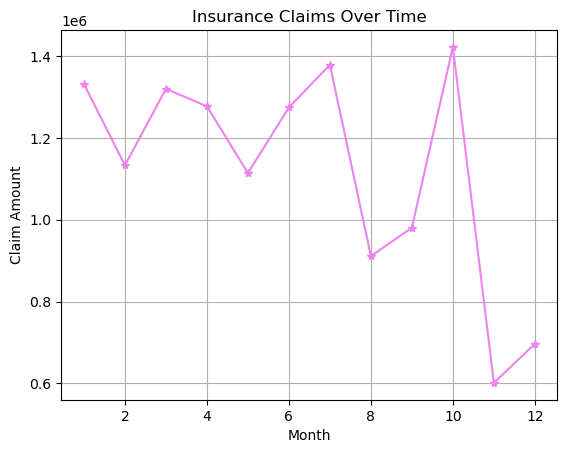

In [69]:
plt.plot(Trand.index, Trand.values, marker='*', color='violet')
plt.xlabel('Month')
plt.ylabel('Claim Amount')
# plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.title('Insurance Claims Over Time')
plt.grid(True)
plt.show()

In [70]:
# sns.set_theme(style="darkgrid")
# sns.lineplot(data=insurance,x='Month',y='claim_amount')
# plt.show()


# sns.set_theme(style="darkgrid")
# sns.lineplot(x=Trand.index,y=Trand)
# plt.show()

### What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [71]:
avg_claim_amount=insurance.groupby(['gender','age_category','fraudulent'])['claim_amount'].mean().reset_index()
avg_claim_amount


,gender,age_category,fraudulent,claim_amount
0,Female,Adult,No,12343.626374
1,Female,Adult,Yes,12462.050000
2,Female,Youth,No,12598.515625
3,Female,Youth,Yes,7599.069444
4,Male,Adult,No,12180.101351
5,Male,Adult,Yes,17062.174699
6,Male,Children,No,23775.000000
7,Male,Children,Yes,32407.000000
8,Male,Youth,No,12048.181818
9,Male,Youth,Yes,10096.391892


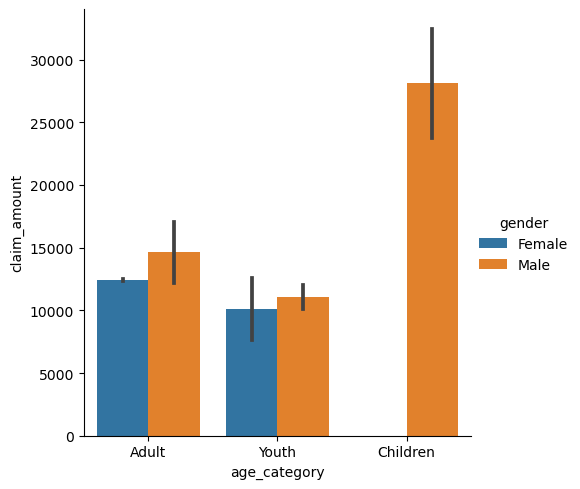

In [72]:
sns.catplot(data=avg_claim_amount,x='age_category',y='claim_amount', hue='gender', kind='bar')

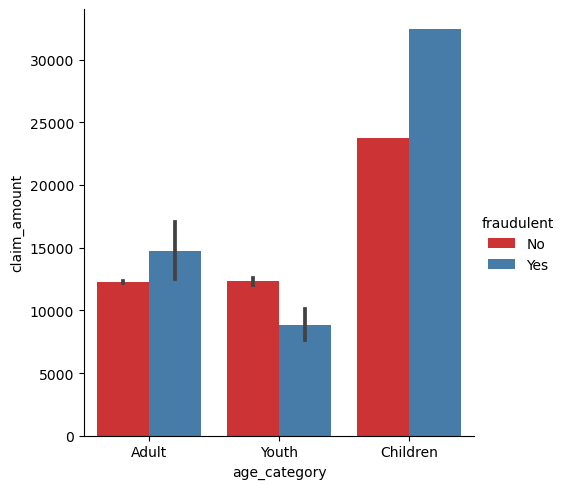

In [73]:
sns.catplot(data=avg_claim_amount,x='age_category',y='claim_amount',
    hue='fraudulent',kind='bar',palette='Set1'),
plt.show()         

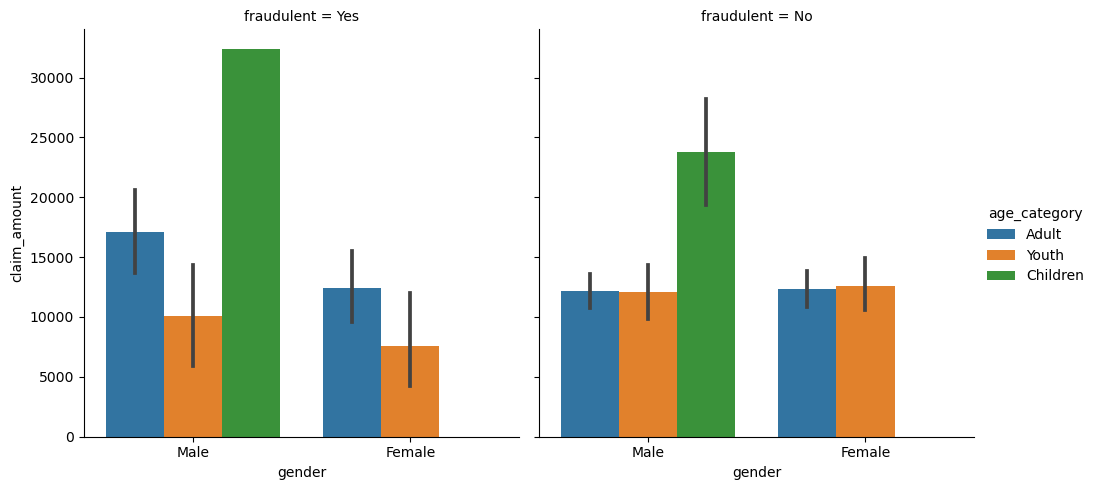

In [74]:
sns.catplot(data=insurance, x="gender", y="claim_amount", hue="age_category", col="fraudulent", kind="bar")
plt.show()

In [75]:
# from cell Fraud by claim chart
# fraud_claim=insurance[insurance['fraudulent']=='Yes']

In [76]:
# Nonfraud_claim=insurance[insurance['fraudulent']=='No']
# # fraud_claim.shape[0]+Nonfraud_claim.shape[0]

In [77]:
# Nonfraud_claim.groupby(['gender','age_category'])['claim_amount'].mean()
# fraud_claim.groupby(['gender','age_category'])['claim_amount'].mean()

In [78]:
# sns.catplot(data=insurance, x='gender', y='claim_amount', kind='violin')
# plt.xlabel('Gender')
# plt.ylabel('Claim Amount')
# plt.title('Side-by-Side Box Plots: Claim Amount `by Gender')
# plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

###     Q1   Is there any similarity in the amount claimed by males and females?

#### 1. Define H0:
            u1 = u2
                or
            Means of male claimed amount & female claimed amount are same

#### 2. Define Ha:
            
            u1 != u2
                or
           Means of male claimed amount & female claimed amount  are different

#### 3. Define CI & pvalues:
          CI = 95 % (cut off = 1.960)
             p value = 0.05

#### 4. Perform test:
            t- test
                     (where we have 2 samples to compare, belonging to different objects, one is gender & other is usage )
                

In [79]:
f_mean=insurance.loc[ insurance.gender == 'Female' , 'claim_amount']

In [80]:
m_mean=insurance.loc[insurance.gender=='Male','claim_amount']

In [81]:
f_mean.mean()

12101.65275142315

In [82]:
m_mean.mean()

12822.784029038112

In [83]:
stats.ttest_ind(f_mean,m_mean)

TtestResult(statistic=-0.8854115573363243, pvalue=0.376132521643629, df=1076.0)

#### 5. Rejection Rule:
            
    New p value(0.376 ) > 0.05
    Hence we fail to reject Null Hypothesis


#### **CLAIMED AMOUNT is MORE OF FEMALE THEN MALE **    

### Q2 Is there any relationship between age category and segment?

#### 1 Null Hypothesis 
##### = Age_category are the independent to the Customert_Segment
#### 2 Alternative Hypothesis 
##### = Age_category are the dependent to the Customer_Segment
#### 3 Confidence Level 
##### = 95% (we decisid p_value as = 0.05)
#### 4 Statistical Test 
##### = we using Chisquare test (finding the relationship between categorys)  


In [84]:
insurance[['age_category','Segment']]

,age_category,Segment
739,Adult,Gold
181,Youth,Platinum
312,Adult,Silver
905,Youth,Gold
120,Adult,Gold
...,...,...
354,Adult,Gold
286,Adult,Gold
226,Adult,Gold
1077,Adult,Platinum


In [85]:
x=pd.crosstab(index=insurance['age_category'],columns=insurance['Segment'])
x

Segment,Gold,Platinum,Silver
age_category,,,
Adult,261,242,239
Children,2,1,0
Youth,108,118,107


In [86]:
stats.chi2_contingency(x)

Chi2ContingencyResult(statistic=2.9238279326481593, pvalue=0.5706524727353277, dof=4, expected_freq=array([[255.36363636, 248.48051948, 238.15584416],
       [  1.03246753,   1.00463822,   0.96289425],
       [114.6038961 , 111.5148423 , 106.8812616 ]]))

####  Decision Rule

    New p value(0.570 ) > 0.05
    Hence we fail to reject Null Hypothesis

####  conclusion

        There is no significant Relationship between Age_Category and Segment 
        Age_category and Segment are independent of each other

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

#### 1 Null Hypothesis 
##### = the avg Claim_amount in current_year equal_to the avg of amount in 2016-17('10,000')
#### 2 Alternative Hypothesis 
##### = the avg  Claim_amount in current_year is different(higher) from avg of amount in 2016-17('10,000')
#### 3 Confidence Level 
##### = 95% (we decisid p_value as = 0.05)
#### 4 Statistical Test 
##### = we using one_sample T_test (compair the two continuous mens )  


In [87]:
insurance.Month.value_counts()

Month
10    121
3     111
7     106
1     105
4     103
5      93
6      91
2      90
8      89
9      77
12     48
11     44
Name: count, dtype: int64

In [88]:
insurance['year']=insurance['claim_date'].dt.year
insurance['year'].value_counts()

year
2017    598
2018    480
Name: count, dtype: int64

In [89]:
y=insurance[insurance['year']==2018]['claim_amount']

In [90]:
stats.ttest_1samp(y,popmean=10000)

TtestResult(statistic=4.402390226936731, pvalue=1.3213347314760531e-05, df=479)

####  Decision Rule

    New p value(1.321e ) < 0.05
    Hence we Reject Null Hypothesis

####  conclusion

        The Average Claim_Amount of this current year"2018" is not equal or higher to the 
         Average Claim_Amount of this year"2017

### 19. Is there any difference between age groups and insurance claims?

#### 1 Null Hypothesis
##### = The mean of adult ,children and youth are Equal | All sample are belong to same population 
#### 2 Alternative Hypothesis
##### = The mean of adult ,children and youth are not Equal | All sample are not to the same population
#### 3 Confidence Level
##### = 95% (we decide p_value as = 0.05)
#### 4 Statistical Test
##### = we using F test ANOVA (finding the Comparesion between the continous and categorical varaibles)


In [91]:
x=insurance.groupby(['age_category'])['claim_amount'].mean()
x

age_category
Adult       12820.572776
Children    26652.333333
Youth       11561.870871
Name: claim_amount, dtype: float64

In [92]:
adult=insurance.loc[insurance['age_category']=='Adult','claim_amount']
youth=insurance.loc[insurance['age_category']=='Youth','claim_amount']
child=insurance.loc[insurance['age_category']=='Children','claim_amount']
# insurance[insurance['age_category'] == 'Adult']['claim_amount']

In [93]:
stats.f_oneway(adult,youth,child)

F_onewayResult(statistic=2.721382899009648, pvalue=0.06623694883457197)

####  Decision Rule

    New p value(0.066) > 0.05
    Hence we  Fail to reject Null Hypothesis

#### 6 Conclusion Statment
          That Age_groups have a Significant Impact on Insurance_Claims,The Mean of the all 3 category are not same

### 20. Is there any relationship between total number of policy claims and the claimed amount?


In [94]:
# insurance.total_policy_claims>

In [95]:
# insurance.claim_amount

#### 1 Null Hypothesis
##### = Policy_claims and Claim_amount they not have any mutual relationship between them
#### 2 Alternative Hypothesis
##### = Policy_claim and Claim_amount they  have a Mutual relationship between them
#### 3 Confidence Level
##### = 95% (we decide p_value as = 0.05)
#### 5 Statistical Test
##### = we using Corraltion (finding the Relationship between the continous and continous varaibles)


In [96]:
stats.pearsonr(insurance.total_policy_claims,insurance.claim_amount)

PearsonRResult(statistic=-0.013895204991377901, pvalue=0.6485965705241583)

#### 4 Decision Rule
      New p value(0.648) > 0.05
        Hence we  Fail to reject Null Hypothesis

#### 6 Conclusion_ statment
    policy_claims and Claim_amount they have no postive or negtive Relationship between Then

# END

In [97]:
# import pandas as pd

# def convert_to_datetime(df, column_name):
# #     """
# #     Converts the specified column in a Pandas DataFrame to datetime dtype.
    
# #     Args:
# #         df (pd.DataFrame): The DataFrame containing the column.
# #         column_name (str): The name of the column to convert.
    
# #     Returns:
# #         pd.DataFrame: The modified DataFrame with the converted column.
# #     """
#     df[column_name] = pd.to_datetime(df[column_name])
#     return df

# # Example usage:
# # raw_data = pd.DataFrame({'Mycol': ['05SEP2014:00:00:00.000']})
# # converted_data = convert_to_datetime(raw_data, 'Mycol')
# # print(converted_data)
